# **(CODE INSTITUDE PROJECT VISUALIZATION)**

---

# Retail Sales ETL and Visualization Project

* Project Overview
This project demonstrates a complete ETL (Extract, Transform, Load) pipeline and exploratory visualizations for retail sales data.  
The dataset contains weekly sales data alongside external factors such as temperature, fuel price, holiday indicators, and markdown discounts.

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Legion\\Desktop\\my_project\\Practice-Funicular1\\practice-funicular1\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Legion\\Desktop\\my_project\\Practice-Funicular1\\practice-funicular1'

# Fisrt Data set visualization (1)

Section 1 content

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('dataset\processed\FEATURES_cleaned.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Legion\AppData\Local\Temp\ipykernel_22860\2488233402.py:1: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('dataset\processed\FEATURES_cleaned.csv')


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
import pandas as pd

# Read data


# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

# Handle missing MarkDown columns (example: fill with 0)
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

# Remove duplicates if any
df = df.drop_duplicates(subset=['Store', 'Date'])

# Optional: Check for outliers (example with Temperature)
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Temperature'] >= Q1 - 1.5 * IQR) & (df['Temperature'] <= Q3 + 1.5 * IQR)]

# Save cleaned data
df.to_csv("cleaned_data.csv", index=False)


In [7]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [31]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set default renderer for Jupyter or browser
pio.renderers.default = "notebook_connected"  # Use "browser" if not in Jupyter

# Sample dataset
data = {
    'Store': [1, 1, 1, 1, 1],
    'Date': ['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05'],
    'Temperature': [42.31, 38.51, 39.93, 46.63, 46.50],
    'Fuel_Price': [2.572, 2.548, 2.514, 2.561, 2.625],
    'MarkDown1': [0, 0, 0, 0, 0],
    'MarkDown2': [0, 0, 0, 0, 0],
    'MarkDown3': [0, 0, 0, 0, 0],
    'MarkDown4': [0, 0, 0, 0, 0],
    'MarkDown5': [0, 0, 0, 0, 0],
    'CPI': [211.096358, 211.242170, 211.289143, 211.319643, 211.350143],
    'Unemployment': [8.106, 8.106, 8.106, 8.106, 8.106],
    'IsHoliday': [False, True, False, False, False]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# -----------------------------
# 1️⃣ Plot Temperature over time
fig_temp = px.line(df, x='Date', y='Temperature',
                   title='Temperature Over Time',
                   markers=True)
fig_temp.show()

# -----------------------------
# 2️⃣ Plot Fuel Price over time
fig_fuel = px.line(df, x='Date', y='Fuel_Price',
                   title='Fuel Price Over Time',
                   markers=True)
fig_fuel.show()

# -----------------------------
# 3️⃣ Plot CPI over time
fig_cpi = px.line(df, x='Date', y='CPI',
                  title='CPI Over Time',
                  markers=True)
fig_cpi.show()

# -----------------------------
# 4️⃣ Combined plot: Temperature & Fuel Price
fig_combined = px.line(df, x='Date', y=['Temperature', 'Fuel_Price'],
                       title='Temperature & Fuel Price Over Time',
                       markers=True)
fig_combined.show()


In [8]:
print(df.columns)


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [9]:
df.rename(columns=lambda x: x.strip(), inplace=True)


In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


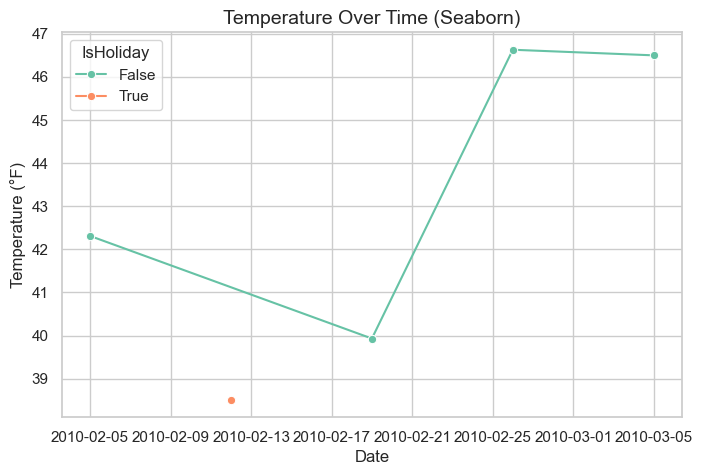

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Store': [1, 1, 1, 1, 1],
    'Date': ['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05'],
    'Temperature': [42.31, 38.51, 39.93, 46.63, 46.50],
    'Fuel_Price': [2.572, 2.548, 2.514, 2.561, 2.625],
    'MarkDown1': [0, 0, 0, 0, 0],
    'MarkDown2': [0, 0, 0, 0, 0],
    'MarkDown3': [0, 0, 0, 0, 0],
    'MarkDown4': [0, 0, 0, 0, 0],
    'MarkDown5': [0, 0, 0, 0, 0],
    'CPI': [211.096358, 211.242170, 211.289143, 211.319643, 211.350143],
    'Unemployment': [8.106, 8.106, 8.106, 8.106, 8.106],
    'IsHoliday': [False, True, False, False, False]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Seaborn lineplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Date', y='Temperature', marker='o', hue='IsHoliday', palette='Set2')
plt.title("Temperature Over Time (Seaborn)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.show()


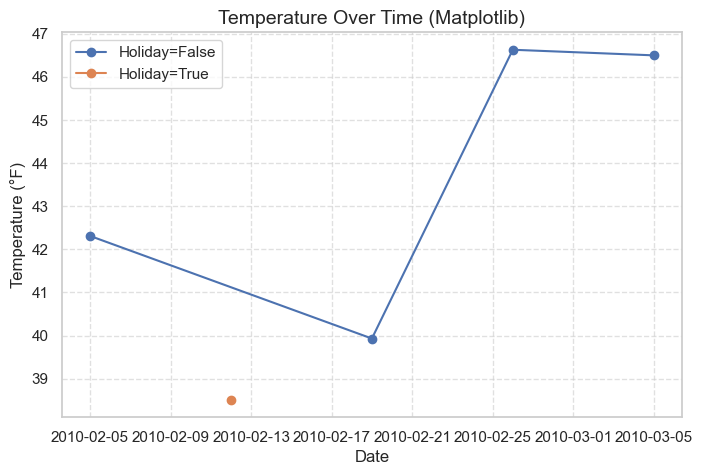

In [12]:
plt.figure(figsize=(8, 5))
for holiday_flag, group_data in df.groupby('IsHoliday'):
    plt.plot(group_data['Date'], group_data['Temperature'], marker='o', 
             label=f"Holiday={holiday_flag}")

plt.title("Temperature Over Time (Matplotlib)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


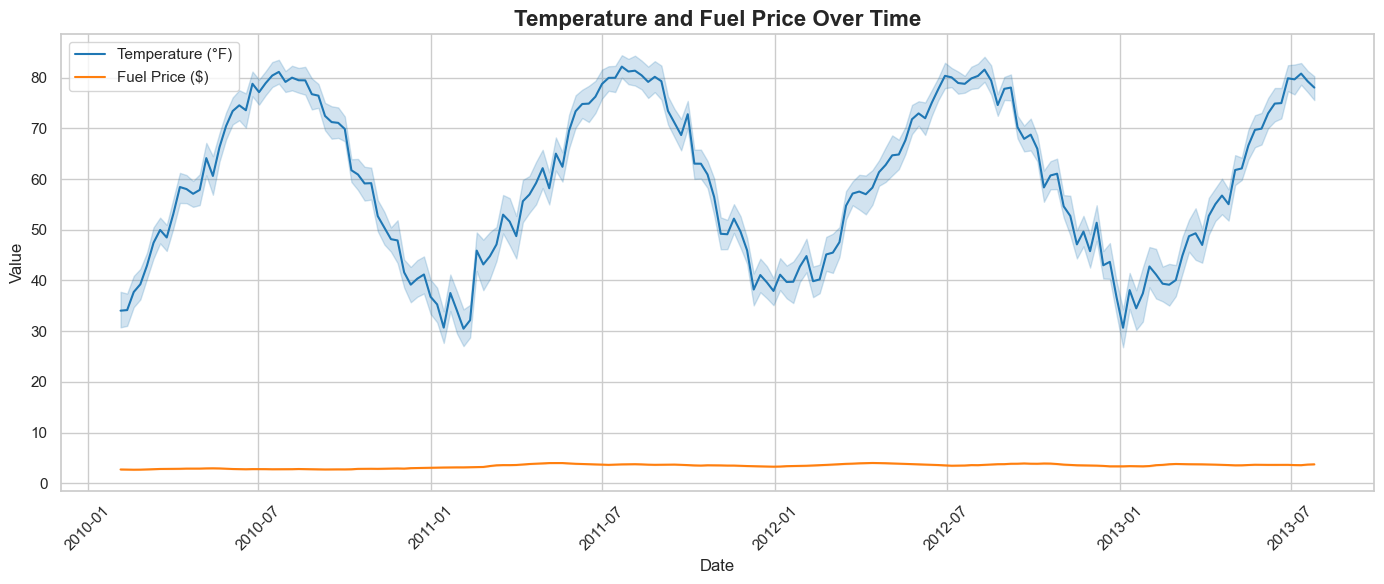

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("FEATURES_cleaned.csv")

# Strip extra spaces in column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Set the style for professional visuals
sns.set_theme(style="whitegrid")

# Create a figure
plt.figure(figsize=(14, 6))

# Plot Temperature
sns.lineplot(data=df, x='Date', y='Temperature', label='Temperature (°F)', color='tab:blue')

# Plot Fuel Price
sns.lineplot(data=df, x='Date', y='Fuel_Price', label='Fuel Price ($)', color='tab:orange')

# Add title and labels
plt.title('Temperature and Fuel Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Improve x-axis readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()


---

# Section Data Set Visualization (2)

Section 2 content

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('dataset/processed/SALES_cleaned_final.csv')


In [16]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [32]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set renderer (use "browser" if not in Jupyter Notebook)
pio.renderers.default = "notebook_connected"

# Dataset
data = {
    'Store': [1, 1, 1, 1, 1],
    'Date': ['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05'],
    'Temperature': [42.31, 38.51, 39.93, 46.63, 46.50],
    'Fuel_Price': [2.572, 2.548, 2.514, 2.561, 2.625],
    'MarkDown1': [0, 0, 0, 0, 0],
    'MarkDown2': [0, 0, 0, 0, 0],
    'MarkDown3': [0, 0, 0, 0, 0],
    'MarkDown4': [0, 0, 0, 0, 0],
    'MarkDown5': [0, 0, 0, 0, 0],
    'CPI': [211.096358, 211.242170, 211.289143, 211.319643, 211.350143],
    'Unemployment': [8.106, 8.106, 8.106, 8.106, 8.106],
    'IsHoliday': [False, True, False, False, False]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Date to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# 1️⃣ Temperature over time
fig_temp = px.line(df, x='Date', y='Temperature',
                   title='Temperature Over Time',
                   markers=True)
fig_temp.show()

# 2️⃣ Fuel Price over time
fig_fuel = px.line(df, x='Date', y='Fuel_Price',
                   title='Fuel Price Over Time',
                   markers=True)
fig_fuel.show()

# 3️⃣ CPI over time
fig_cpi = px.line(df, x='Date', y='CPI',
                  title='CPI Over Time',
                  markers=True)
fig_cpi.show()

# 4️⃣ Combined Temperature & Fuel Price
fig_combined = px.line(df, x='Date', y=['Temperature', 'Fuel_Price'],
                       title='Temperature & Fuel Price Over Time',
                       markers=True)
fig_combined.show()


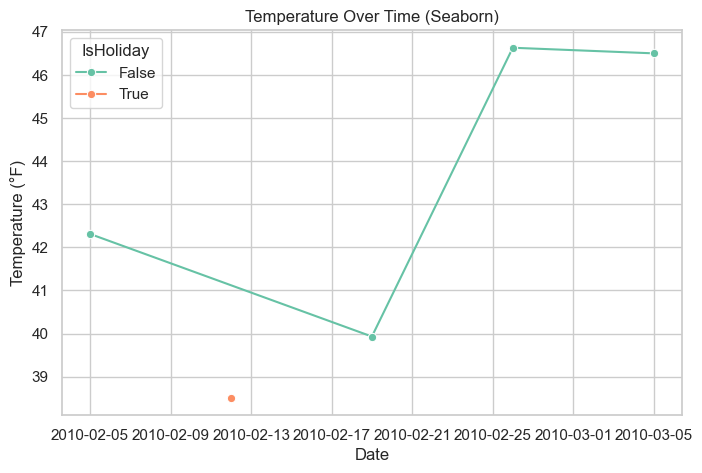

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    'Store': [1, 1, 1, 1, 1],
    'Date': ['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05'],
    'Temperature': [42.31, 38.51, 39.93, 46.63, 46.50],
    'Fuel_Price': [2.572, 2.548, 2.514, 2.561, 2.625],
    'MarkDown1': [0, 0, 0, 0, 0],
    'MarkDown2': [0, 0, 0, 0, 0],
    'MarkDown3': [0, 0, 0, 0, 0],
    'MarkDown4': [0, 0, 0, 0, 0],
    'MarkDown5': [0, 0, 0, 0, 0],
    'CPI': [211.096358, 211.242170, 211.289143, 211.319643, 211.350143],
    'Unemployment': [8.106, 8.106, 8.106, 8.106, 8.106],
    'IsHoliday': [False, True, False, False, False]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Seaborn line plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Date', y='Temperature', marker='o', hue='IsHoliday', palette='Set2')
plt.title("Temperature Over Time (Seaborn)")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.show()


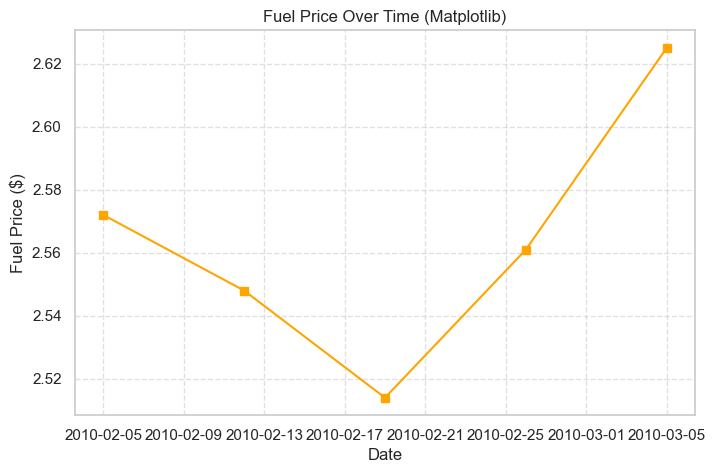

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(df['Date'], df['Fuel_Price'], marker='s', linestyle='-', color='orange')
plt.title("Fuel Price Over Time (Matplotlib)")
plt.xlabel("Date")
plt.ylabel("Fuel Price ($)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


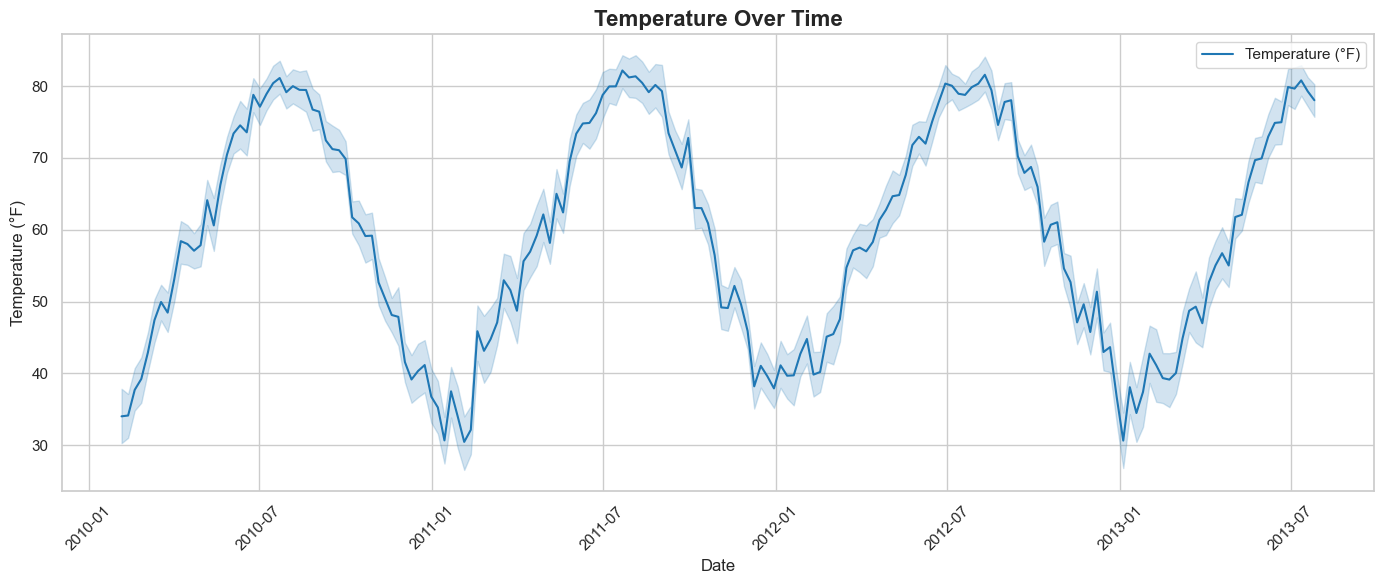

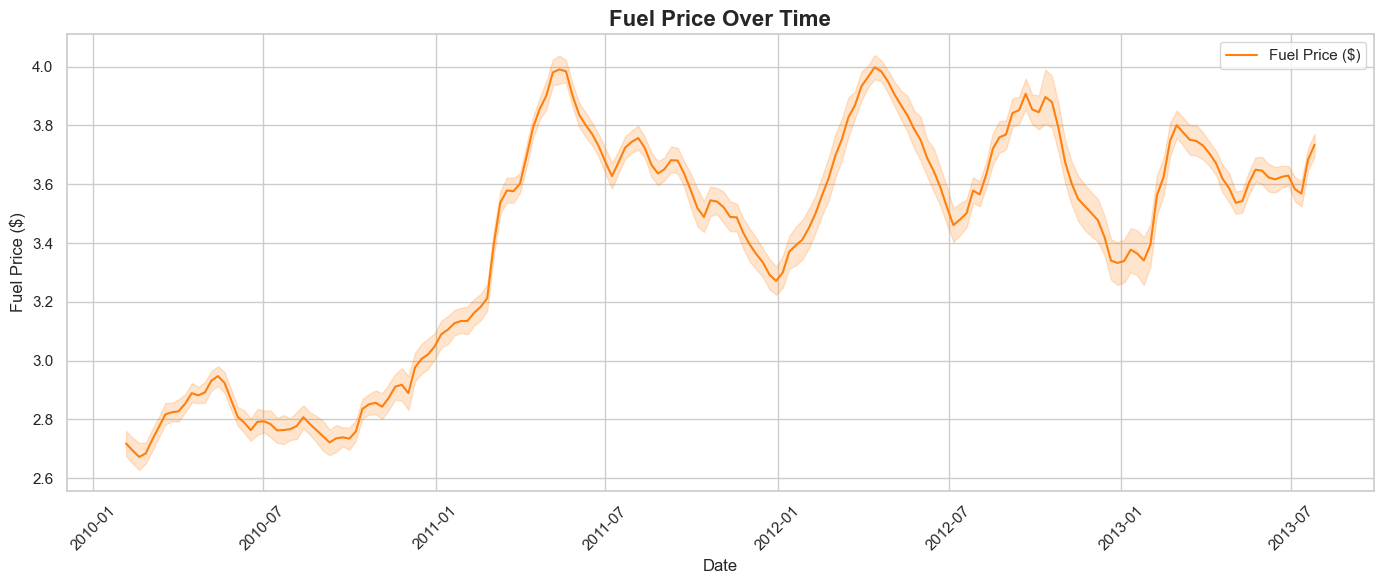

C:\Users\Legion\AppData\Local\Temp\ipykernel_22860\576900053.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='IsHoliday', palette=['green', 'red'])


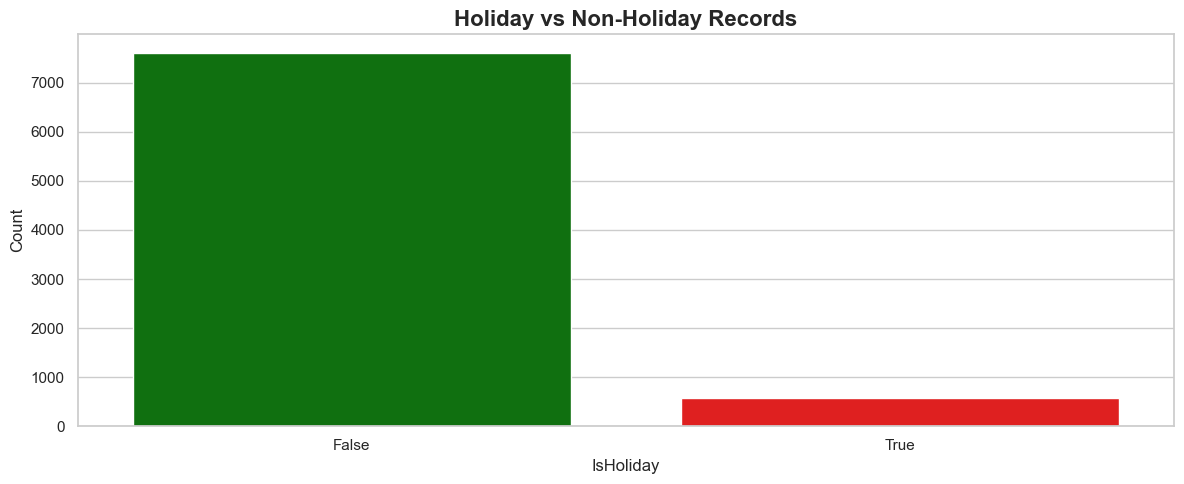

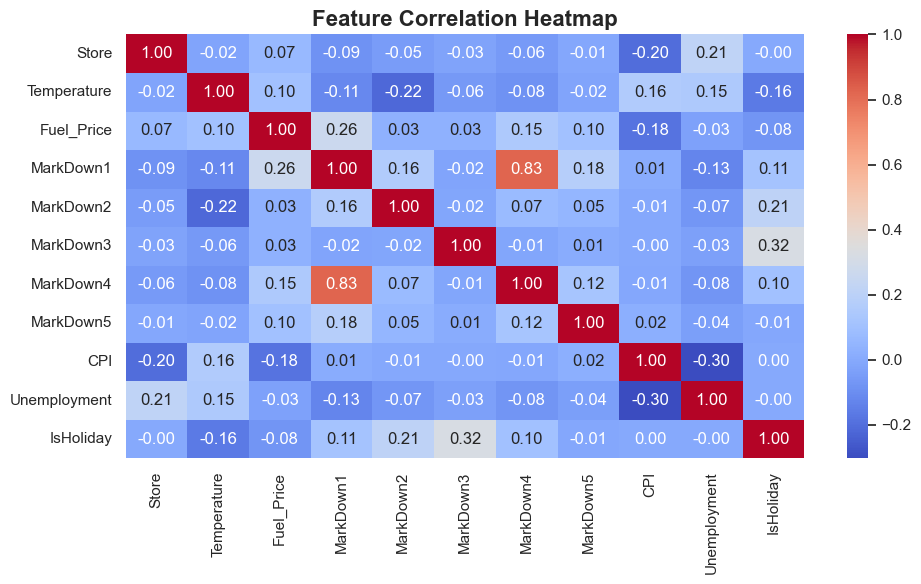

In [19]:


 #Updated Visualization Code for `SALES_cleaned_final.csv`

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("dataset/processed/SALES_cleaned_final.csv")

# Ensure column names are stripped of extra spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set seaborn style
sns.set_theme(style="whitegrid")

# --- Visualization 1: Temperature over time ---
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Temperature', label='Temperature (°F)', color='tab:blue')
plt.title('Temperature Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# --- Visualization 2: Fuel Price over time ---
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Fuel_Price', label='Fuel Price ($)', color='tab:orange')
plt.title('Fuel Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Fuel Price ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# --- Visualization 3: Holiday vs Non-Holiday Records ---
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='IsHoliday', palette=['green', 'red'])
plt.title('Holiday vs Non-Holiday Records', fontsize=16, fontweight='bold')
plt.xlabel('IsHoliday')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# --- Visualization 4: Correlation heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# **(Visualization for Final dataset (3))**

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('dataset/processed/STORES_cleaned_final.csv')
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Total_MarkDown
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0


In [33]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set renderer (change to "browser" if running outside Jupyter)
pio.renderers.default = "notebook_connected"

# Dataset
data = {
    'Store': [1, 1, 1, 1, 1],
    'Date': ['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05'],
    'Temperature': [42.31, 38.51, 39.93, 46.63, 46.50],
    'Fuel_Price': [2.572, 2.548, 2.514, 2.561, 2.625],
    'MarkDown1': [0, 0, 0, 0, 0],
    'MarkDown2': [0, 0, 0, 0, 0],
    'MarkDown3': [0, 0, 0, 0, 0],
    'MarkDown4': [0, 0, 0, 0, 0],
    'MarkDown5': [0, 0, 0, 0, 0],
    'CPI': [211.096358, 211.242170, 211.289143, 211.319643, 211.350143],
    'Unemployment': [8.106, 8.106, 8.106, 8.106, 8.106],
    'IsHoliday': [False, True, False, False, False],
    'Total_MarkDown': [0, 0, 0, 0, 0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 1️⃣ Temperature over time
fig_temp = px.line(df, x='Date', y='Temperature',
                   title='Temperature Over Time',
                   markers=True)
fig_temp.show()

# 2️⃣ Fuel Price over time
fig_fuel = px.line(df, x='Date', y='Fuel_Price',
                   title='Fuel Price Over Time',
                   markers=True)
fig_fuel.show()

# 3️⃣ CPI over time
fig_cpi = px.line(df, x='Date', y='CPI',
                  title='CPI Over Time',
                  markers=True)
fig_cpi.show()

# 4️⃣ Total_MarkDown over time
fig_markdown = px.line(df, x='Date', y='Total_MarkDown',
                       title='Total MarkDown Over Time',
                       markers=True)
fig_markdown.show()

# 5️⃣ Combined: Temperature, Fuel Price, and Total_MarkDown
fig_combined = px.line(df, x='Date', y=['Temperature', 'Fuel_Price', 'Total_MarkDown'],
                       title='Temperature, Fuel Price & Total MarkDown Over Time',
                       markers=True)
fig_combined.show()


In [22]:
print(df.columns.tolist())


['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Total_MarkDown']


In [23]:
# Remove leading/trailing spaces from all column names
df.rename(columns=lambda x: x.strip(), inplace=True)


In [24]:
df.columns = df.columns.str.strip()  # removes any leading/trailing spaces



In [25]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Total_MarkDown
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0


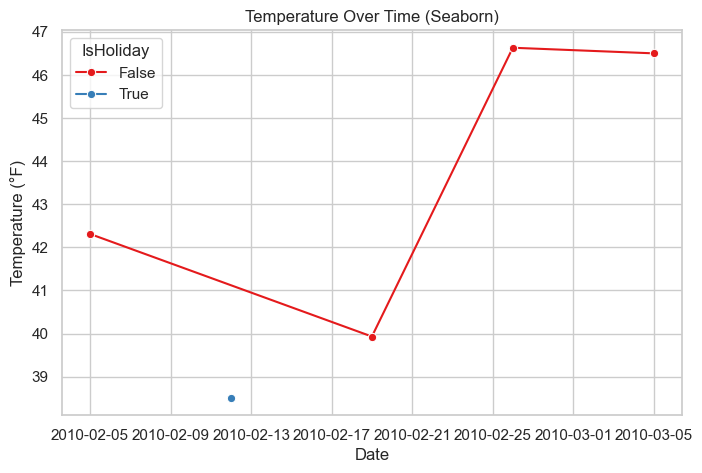

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    'Store': [1, 1, 1, 1, 1],
    'Date': ['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05'],
    'Temperature': [42.31, 38.51, 39.93, 46.63, 46.50],
    'Fuel_Price': [2.572, 2.548, 2.514, 2.561, 2.625],
    'MarkDown1': [0, 0, 0, 0, 0],
    'MarkDown2': [0, 0, 0, 0, 0],
    'MarkDown3': [0, 0, 0, 0, 0],
    'MarkDown4': [0, 0, 0, 0, 0],
    'MarkDown5': [0, 0, 0, 0, 0],
    'CPI': [211.096358, 211.242170, 211.289143, 211.319643, 211.350143],
    'Unemployment': [8.106, 8.106, 8.106, 8.106, 8.106],
    'IsHoliday': [False, True, False, False, False]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Seaborn line plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Date', y='Temperature', hue='IsHoliday', marker='o', palette='Set1')
plt.title("Temperature Over Time (Seaborn)")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.show()


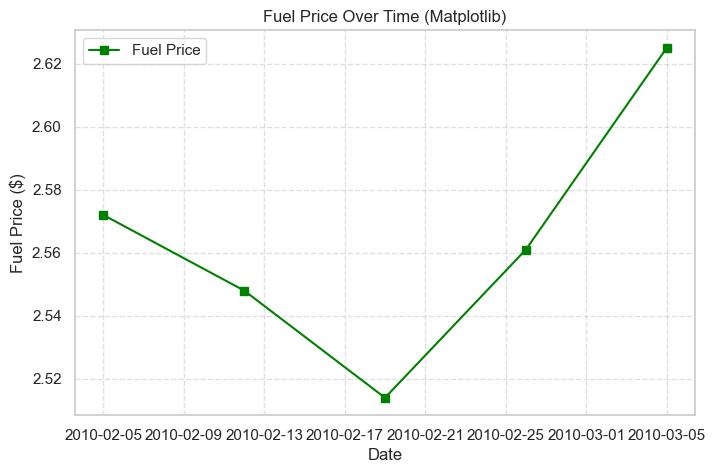

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(df['Date'], df['Fuel_Price'], color='green', marker='s', linestyle='-', label='Fuel Price')
plt.title("Fuel Price Over Time (Matplotlib)")
plt.xlabel("Date")
plt.ylabel("Fuel Price ($)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


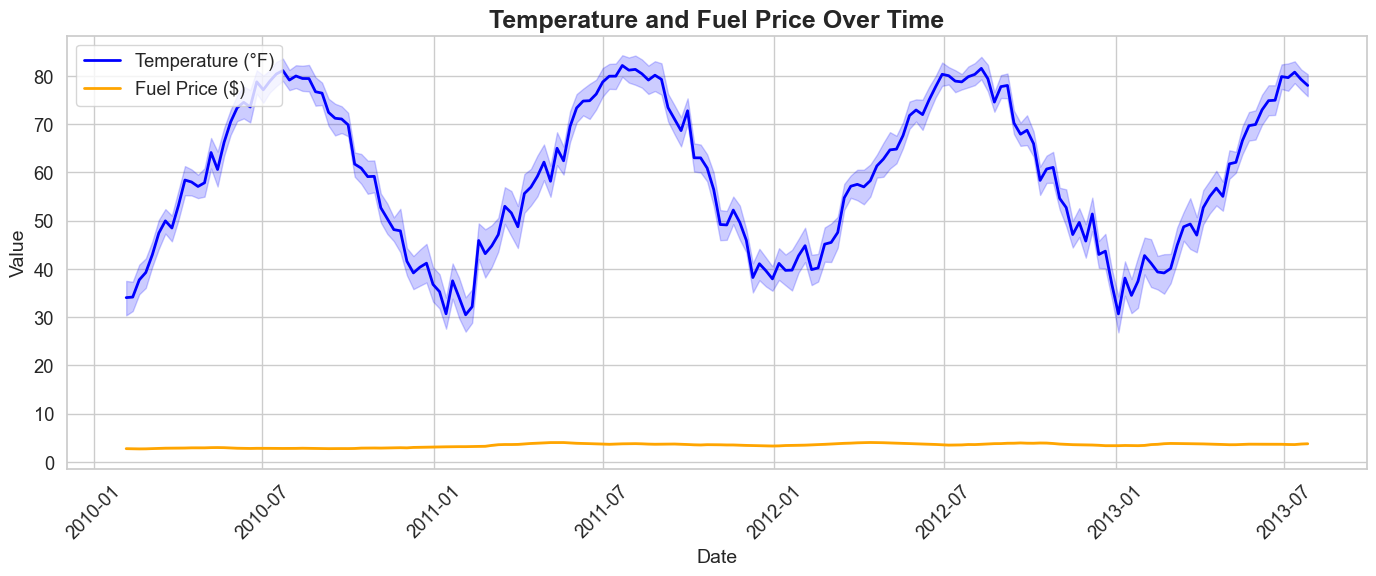

C:\Users\Legion\AppData\Local\Temp\ipykernel_22860\56670346.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsHoliday', data=df, palette=['#2ecc71', '#e74c3c'])


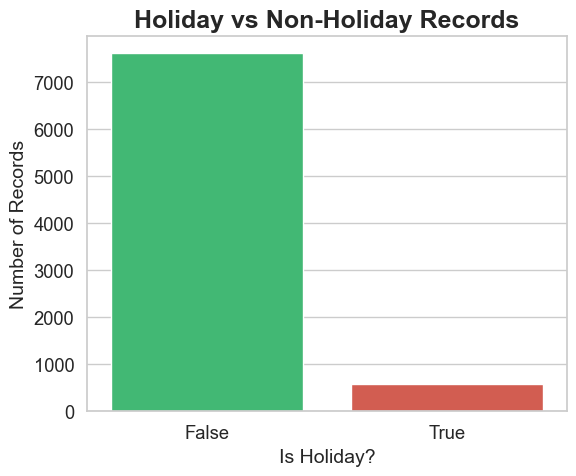

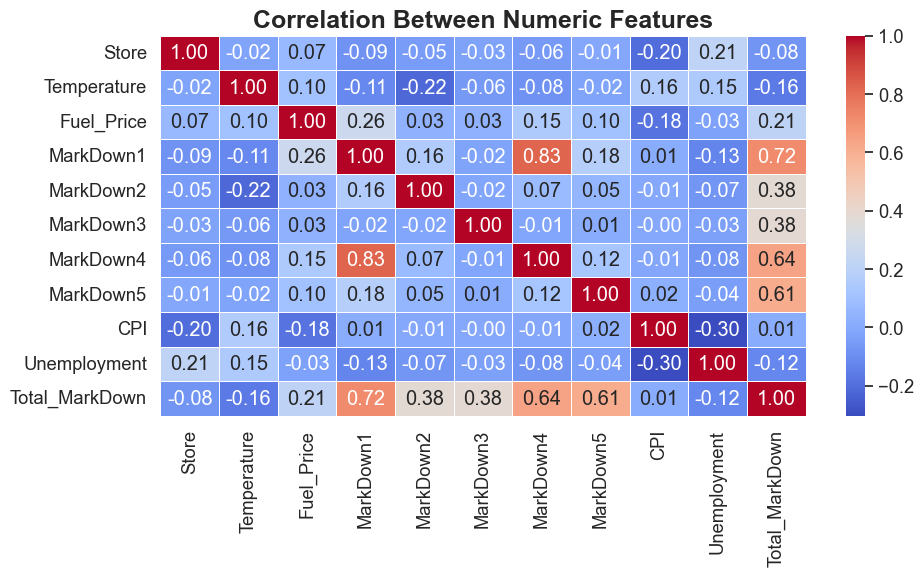

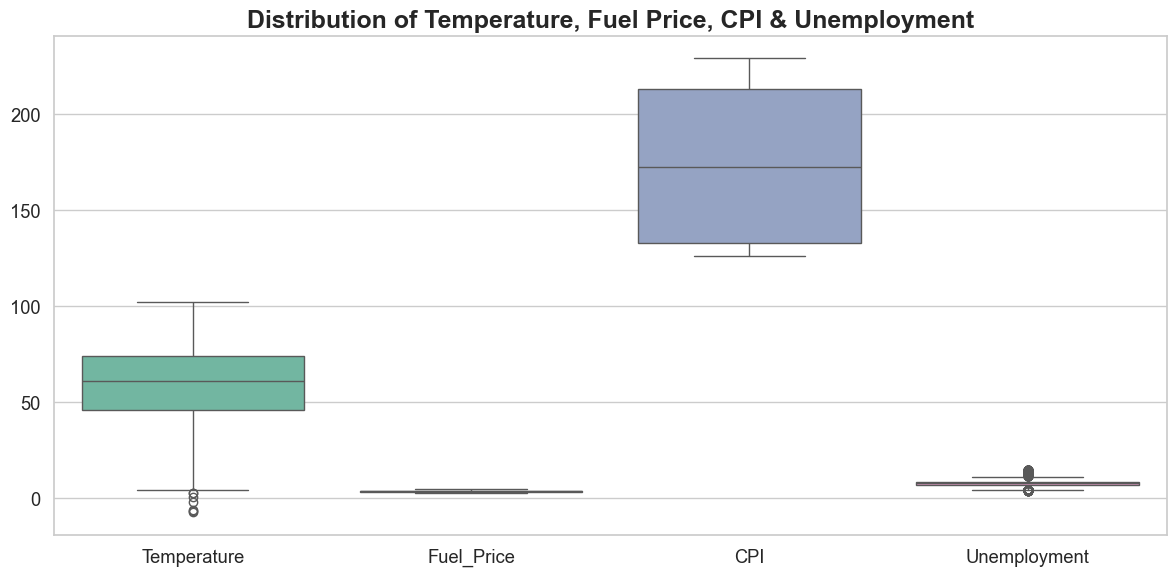

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
#  Load and prepare the dataset
# ==============================
df = pd.read_csv('dataset/processed/STORES_cleaned_final.csv')
# Clean column names and ensure Date is parsed
df.columns = df.columns.str.strip()
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Apply a clean Seaborn theme
sns.set_theme(style="whitegrid", font_scale=1.2)

# ==============================
#  1. Temperature & Fuel Price Trend
# ==============================
if 'Temperature' in df.columns and 'Fuel_Price' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.lineplot(x='Date', y='Temperature', data=df, label='Temperature (°F)', color='blue', linewidth=2)
    sns.lineplot(x='Date', y='Fuel_Price', data=df, label='Fuel Price ($)', color='orange', linewidth=2)
    plt.title("Temperature and Fuel Price Over Time", fontsize=18, fontweight='bold')
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==============================
#  2. Holiday vs Non-Holiday Count
# ==============================
if 'IsHoliday' in df.columns:
    plt.figure(figsize=(6, 5))
    sns.countplot(x='IsHoliday', data=df, palette=['#2ecc71', '#e74c3c'])
    plt.title("Holiday vs Non-Holiday Records", fontsize=18, fontweight='bold')
    plt.xlabel("Is Holiday?", fontsize=14)
    plt.ylabel("Number of Records", fontsize=14)
    plt.tight_layout()
    plt.show()

# ==============================
#  3. Correlation Heatmap
# ==============================
numeric_df = df.select_dtypes(include=['number'])
if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Between Numeric Features", fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
# ==============================
#  4. Distribution of Key Numeric Features
# ==============================
features_to_plot = [col for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] if col in df.columns]
if features_to_plot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[features_to_plot], palette='Set2')
    plt.title("Distribution of Temperature, Fuel Price, CPI & Unemployment", fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [29]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)